# 2 - F data

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [3]:
data_f = pd.read_csv("forbes_billionaire_dataset.csv") 

In [4]:
data_f

,rank,name,age,source,country_citizenship,net_worth
0,1,Bill Gates,62,Microsoft,United States,8.600000e+10
1,2,Warren Buffett,87,Berkshire Hathaway,United States,7.560000e+10
2,3,Jeff Bezos,53,Amazon.com,United States,7.280000e+10
3,4,Amancio Ortega,81,Zara,Spain,7.130000e+10
4,5,Mark Zuckerberg,33,Facebook,United States,5.600000e+10
...,...,...,...,...,...,...
2038,1940,Yao Xinyi,53,air conditioning,China,1.000000e+09
2039,1940,Fatma Yazici,44,diversified,Turkey,1.000000e+09
2040,1940,Zhang Changhong,59,financial information service,China,1.000000e+09
2041,1940,Zhang Cheng Fei,50,paper & related products,China,1.000000e+09


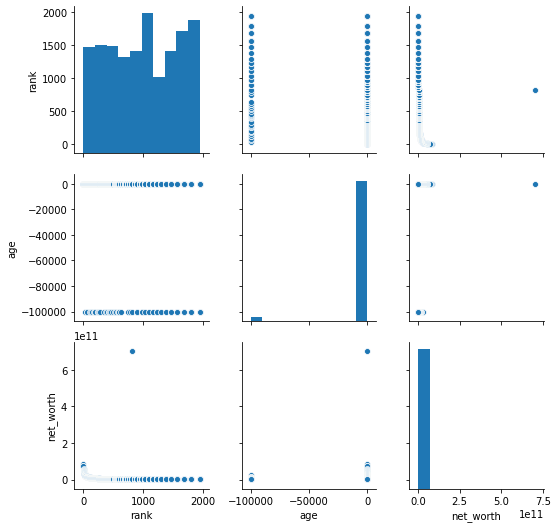

In [5]:
sns.pairplot(data_f ,palette = 'coolwarm')

# Quick concolusion : 


In [6]:
data_f.groupby("age").count()


,rank,name,source,country_citizenship,net_worth
age,,,,,
-100000,64,64,64,64,64
21,1,1,1,1,1
22,1,1,1,1,1
24,1,1,1,1,1
27,3,3,3,3,3
...,...,...,...,...,...
96,2,2,2,2,2
97,2,2,2,2,2
98,1,1,1,1,1


Source might have relation


country_citizen have relation


country citizen need one hot encoding


age have non logic values 


In [8]:
data_f.drop(['name'] ,axis = 1,inplace = True)
data_f.replace(-100000, 40 , inplace = True)
data_f

,rank,age,source,country_citizenship,net_worth
0,1,62,Microsoft,United States,8.600000e+10
1,2,87,Berkshire Hathaway,United States,7.560000e+10
2,3,53,Amazon.com,United States,7.280000e+10
3,4,81,Zara,Spain,7.130000e+10
4,5,33,Facebook,United States,5.600000e+10
...,...,...,...,...,...
2038,1940,53,air conditioning,China,1.000000e+09
2039,1940,44,diversified,Turkey,1.000000e+09
2040,1940,59,financial information service,China,1.000000e+09
2041,1940,50,paper & related products,China,1.000000e+09


In [9]:
data_f.groupby('age').count()


,rank,source,country_citizenship,net_worth
age,,,,
21,1,1,1,1
22,1,1,1,1
24,1,1,1,1
27,3,3,3,3
29,2,2,2,2
...,...,...,...,...
96,2,2,2,2
97,2,2,2,2
98,1,1,1,1


one hot encoing for country and source

In [10]:
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(data_f["country_citizenship"])
country_citizenship =  pd.DataFrame(lb_results, columns=lb_style.classes_)
#country_citizenship

In [11]:
lb_style1 = LabelBinarizer()
lb_results1 = lb_style1.fit_transform(data_f["source"])
source =  pd.DataFrame(lb_results1, columns=lb_style1.classes_)
#source

In [12]:
data_f.drop(['country_citizenship'] ,axis = 1,inplace = True)
data_f.drop(['source'] ,axis = 1,inplace = True)

In [13]:
data_ = pd.concat([country_citizenship , data_f],axis = 1 )

In [14]:
data_

,Algeria,Angola,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,...,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Venezuela,Vietnam,rank,age,net_worth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,62,8.600000e+10
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,87,7.560000e+10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3,53,7.280000e+10
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,81,7.130000e+10
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,5,33,5.600000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1940,53,1.000000e+09
2039,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1940,44,1.000000e+09
2040,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1940,59,1.000000e+09
2041,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1940,50,1.000000e+09


In [15]:
data_1 =  data_.to_numpy()

In [16]:
x = data_1[:,:-1]
y = data_1[:,-1]

In [17]:
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_features, train_labels)
y_pred = reg.predict(test_features)

In [21]:
reg.score(test_features,test_labels )

-4504857879109916.0

In [22]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [23]:
y_pred = regr.predict(test_features)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(test_labels,y_pred)

0.9096761891449407